# Pymaceuticals Inc.
---

### Analysis

- Out of Capomulin, Ramicane, Infubinol, and Ceftamin, Capomulin and Ramicane showed the lowest final tumor volume. Infubinol has a low final volume outlier that could be worth further inevstigation to determine if future studies should try to recreate it or dismiss it.

- One general trend is that there is a direct relationship between the weight of the mouse and the average tumor volume, so we need to consider the sample groups for each treatment. It will be worthwhile to examine the distribution of mouse weight within each treatment group to ensure we haven't skewed our results by placing a concentration of lighter mouses in certain treatments.
 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [18]:
# split in order to view separate df's before merging
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [19]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [20]:
# split in order to view separate df's before merging
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [22]:
# Combine the data into a single DataFrame
df_raw = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
df_raw.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [23]:
# Checking the number of mice.
df_raw["Mouse ID"].nunique()

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df_raw[df_raw.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicates['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# found ~ with google/chatgpt and learned it inverts a boolean so in this case we're left with all mice id's that are not in duplicate mice
df = df_raw[~df_raw['Mouse ID'].isin(duplicate_mice)]

In [27]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ1 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summ1.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'variance': 'Tumor Volume Variance',
    'std_dev': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
}, inplace=True)

summ1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summ2 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)

summ2

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

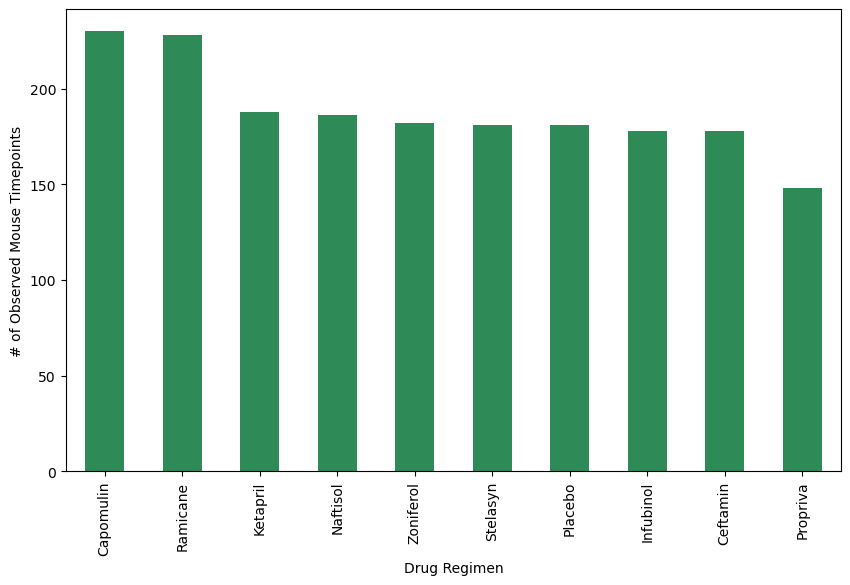

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# working to get numeric data to plot
drug_counts = df['Drug Regimen'].value_counts()

drug_counts_df = drug_counts.reset_index()
drug_counts_df.columns = ['Drug Regimen', 'Count']

drug_counts_df.plot(', kind='bar', legend=False, figsize=(10, 6), color='seagreen', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')


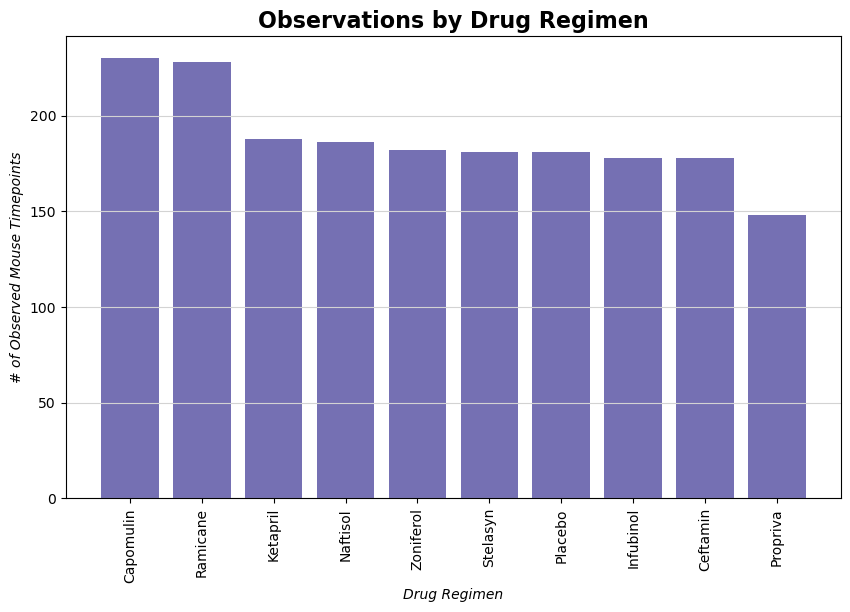

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# step 1: get the data
x = df['Drug Regimen'].value_counts().sort_values(ascending=False)

# step 2: create the canvas
plt.figure(figsize=(10, 6))

# step 3: create basic plot
plt.bar(x.index, x.values, color="#7570b3")

# step 4: customize
plt.xlabel("Drug Regimen", fontstyle="italic")
plt.xticks(rotation=90)

plt.ylabel("# of Observed Mouse Timepoints", fontstyle="italic")

plt.title("Observations by Drug Regimen", fontsize=16, fontweight="bold")

plt.grid(color="lightgrey", axis="y")

# step 5: show/save
plt.show()

<Axes: >

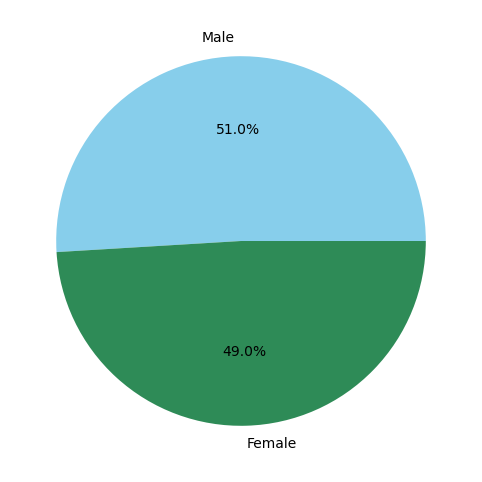

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = df['Sex'].value_counts()

sex_counts.plot(kind='pie', legend=False, figsize=(10, 6), colors=['skyblue', 'seagreen'], autopct='%1.1f%%', ylabel='')


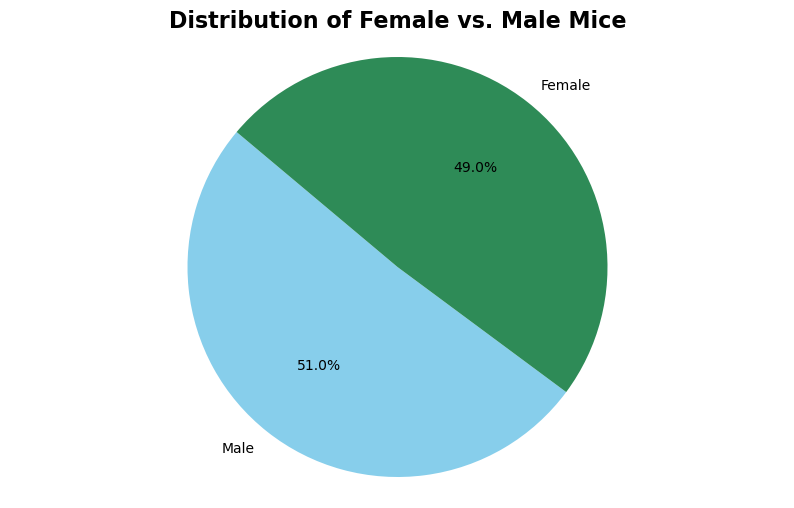

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# step 1: get the data
x = df['Sex'].value_counts()

# step 2: create the canvas
plt.figure(figsize=(10, 6))

# step 3: create basic plot
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'seagreen'])


# step 4: customize
plt.title("Distribution of Female vs. Male Mice", fontsize=16, fontweight="bold")
plt.axis('equal')

# step 5: show/save
plt.show()

## Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_df = df[df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_timepoint_df.merge(df, on=['Mouse ID', 'Timepoint'], how='left')

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


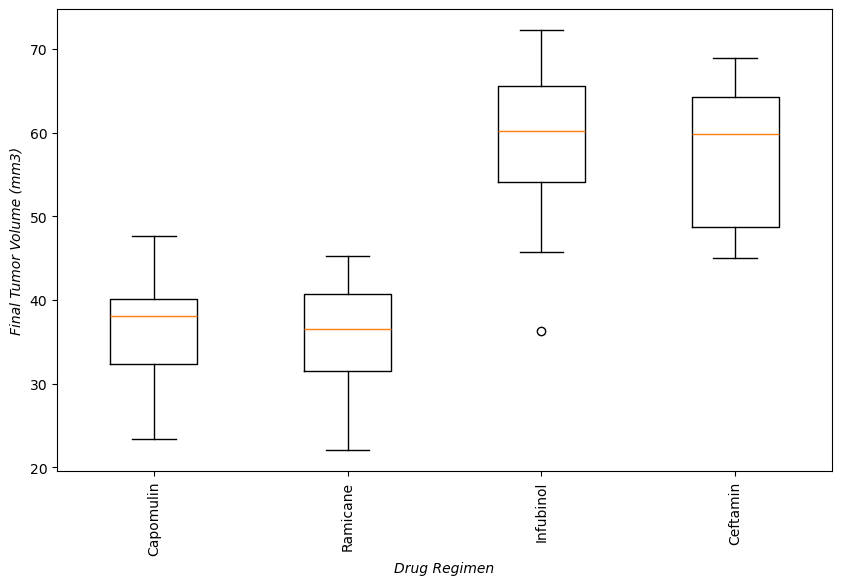

In [77]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# step 1: get the data
x = [merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]

# step 2: create the canvas
plt.figure(figsize=(10, 6))

# step 3: create basic plot
plt.boxplot(x, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# step 4: customize
plt.xlabel("Drug Regimen", fontstyle="italic")
plt.xticks(rotation=90)

plt.ylabel("Final Tumor Volume (mm3)", fontstyle="italic")

# step 5: show/save
plt.show()

## Line and Scatter Plots

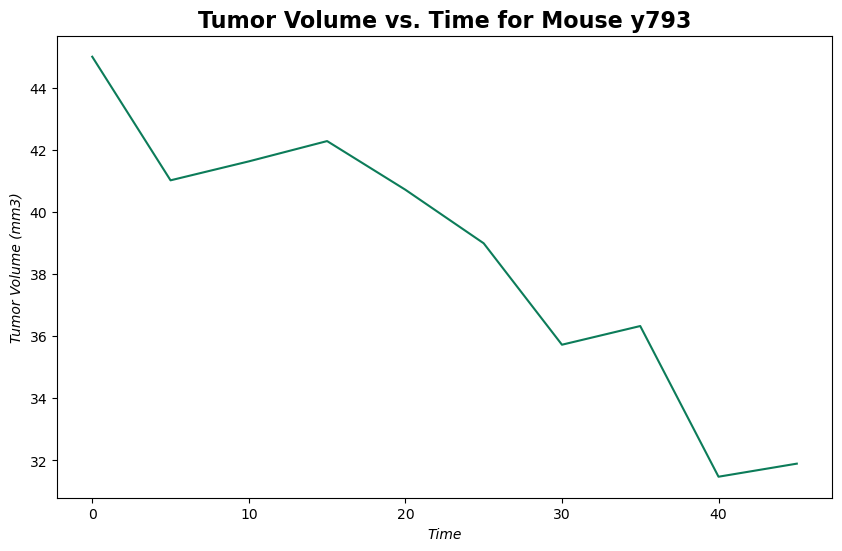

In [85]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# get data
mask1 = df['Drug Regimen'] == 'Capomulin'

df_cap = df.loc[mask1]

mask2 = df_cap['Mouse ID'] == 'y793'

df_mouse = df_cap.loc[mask2]

x = df_mouse.Timepoint
y = df_mouse['Tumor Volume (mm3)']

# create the plot
plt.figure(figsize=(10, 6))

plt.plot(x, y, color="#0C7C59")

# custom
plt.title("Tumor Volume vs. Time for Mouse y793", fontsize=16, fontweight="bold")
plt.xlabel("Time", fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontstyle="italic")

# show/save
plt.show()

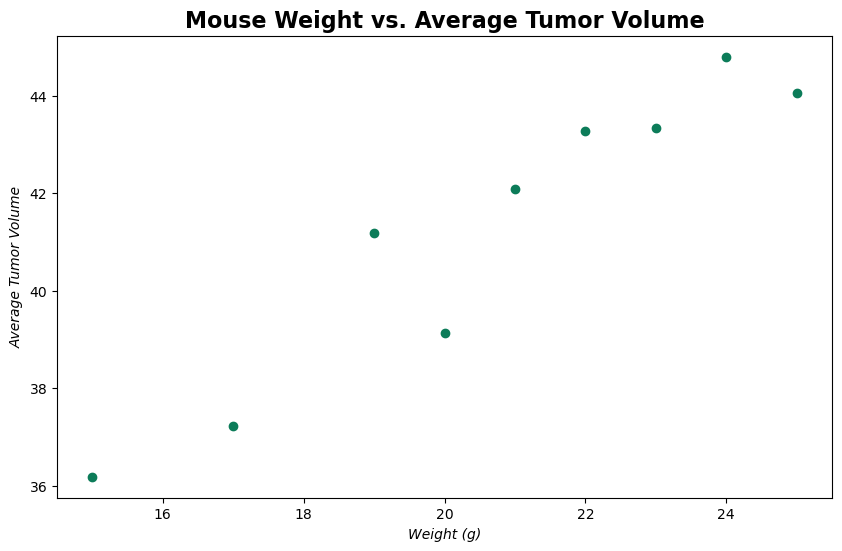

In [97]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# get data
mask1 = df['Drug Regimen'] == 'Capomulin'

df_cap = df.loc[mask1]

mean_vol = df_cap.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

x = mean_vol['Weight (g)']
y = mean_vol['Tumor Volume (mm3)']

# create the plot
plt.figure(figsize=(10, 6))

plt.scatter(x, y, color="#0C7C59")

# custom
plt.title("Mouse Weight vs. Average Tumor Volume", fontsize=16, fontweight="bold")
plt.xlabel("Weight (g)", fontstyle="italic")
plt.ylabel("Average Tumor Volume", fontstyle="italic")

# show/save
plt.show()

## Correlation and Regression

Correlation coefficient: 0.9505243961855268


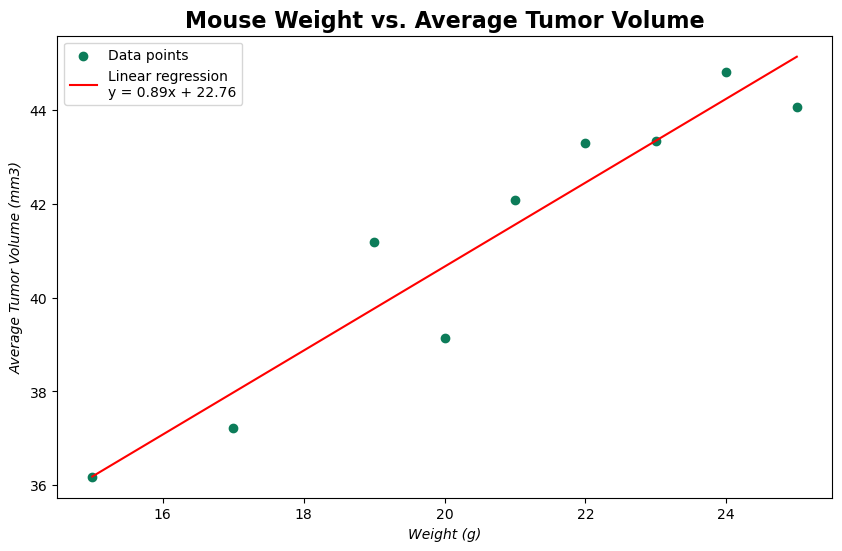

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# utilized google/chatgpt for the code below to get linear regression, also had to import linregress and numpy
mask1 = df['Drug Regimen'] == 'Capomulin'
df_cap = df.loc[mask1]

# Group by weight and calculate mean tumor volume
mean_tumor_volume = df_cap.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Extracting x and y for plotting
x = mean_tumor_volume['Weight (g)']
y = mean_tumor_volume['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print(f"Correlation coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate regression line
regression_line = slope * x + intercept

# create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="#0C7C59", label="Data points")
plt.plot(x, regression_line, color="red", label=f"Linear regression\ny = {slope:.2f}x + {intercept:.2f}")

# custom
plt.title("Mouse Weight vs. Average Tumor Volume", fontsize=16, fontweight="bold")
plt.xlabel("Weight (g)", fontstyle="italic")
plt.ylabel("Average Tumor Volume (mm3)", fontstyle="italic")
plt.legend()

# show/save
plt.show()
